# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:


import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss, r2_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

KNeighboursClassifier = KNeighborsClassifier

/home/zerosum24/.conda/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [2]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:

In [3]:
# Loading the training/testing datasets for Images_C_*.csv

# Loading the training set
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
images_c_train = pd.read_csv(data_path)

# Loading the testing set
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
images_c_test = pd.read_csv(data_path)

# Loading the validation set
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
images_c_valid = pd.read_csv(data_path)

print("Training:   The number of entries is {0} and the amount of attributes is {1}."
      .format(images_c_train.shape[0], images_c_train.shape[1]))
print("Validation: The number of entries is {0} and the amount of attributes is {1}."
      .format(images_c_valid.shape[0], images_c_valid.shape[1]))
print("Testing:    The number of entries is {0} and the amount of attributes is {1}: with none of the class labels"
      .format(images_c_test.shape[0], images_c_test.shape[1]) 
      + "\n            (barring a null valued is_person column).")


Training:   The number of entries is 2113 and the amount of attributes is 520.
Validation: The number of entries is 1113 and the amount of attributes is 520.
Testing:    The number of entries is 1114 and the amount of attributes is 501: with none of the class labels
            (barring a null valued is_person column).


In [4]:
# Method to filter the unneeded features of a dataframe
def feature_filtering(dataframe, regex="dim"):

    # last data structure to hold unwanted features
    indx_lst = []

    # Building a list of any features that are not visual features
    for attribute in dataframe.columns:
        # ensuring attribute is not a visual feature
        if attribute[0:len(regex)] != regex:
            indx_lst.append(attribute)
            
    return dataframe.drop(columns=indx_lst, axis=1)

In [5]:
# Splitting into training, testing and validation sets

# Splitting the training set
X_train = feature_filtering(images_c_train)
y_train = images_c_train['is_person']

# Splitting the validation set
X_valid = feature_filtering(images_c_valid)
y_valid = images_c_valid['is_person'].values

# Splitting the testing set
X_test = feature_filtering(images_c_test)
y_test = images_c_test['is_person'].values


In [6]:
# Summarising key properties of the data using the appropriate pandas methods:

print("X_train properties")
print("------------------")
# displaying overview information
X_train.info() 

# displaying statistical information about the dataset
display(X_train.describe())

print("\nX_valid properties")
print("------------------")
# displaying overview information
X_valid.info() 

# displaying statistical information about the dataset
display(X_valid.describe())

print("\nX_test properties")
print("------------------")
# displaying overview information
X_test.info() 

# displaying statistical information about the dataset
display(X_test.describe())

X_train properties
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Columns: 500 entries, dim1 to dim500
dtypes: float64(500)
memory usage: 8.1 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.050306,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.561111,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.001019,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.001860,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.003005,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.922150,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755



X_valid properties
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 500 entries, dim1 to dim500
dtypes: float64(494), int64(6)
memory usage: 4.2 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.002142,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001600,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.001019,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.001838,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.002976,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.009821,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786



X_test properties
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Columns: 500 entries, dim1 to dim500
dtypes: float64(500)
memory usage: 4.2 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,...,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.001754,0.000717,0.004379,0.001839,0.002207,0.002105,0.001058,0.002535,0.002053,0.002746,...,0.002033,0.000577,0.004880,0.001537,0.003591,0.002080,0.002897,0.002216,0.002438,0.003017
std,0.001226,0.001522,0.003648,0.001320,0.001539,0.001612,0.000863,0.002867,0.001990,0.002470,...,0.001597,0.001146,0.006427,0.001200,0.002626,0.001519,0.003240,0.001449,0.001897,0.002795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000977,0.000000,0.001488,0.000744,0.001019,0.001019,0.000340,0.000679,0.000744,0.001065,...,0.000791,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001065,0.001019,0.001019
50%,0.001590,0.000340,0.003397,0.001698,0.001860,0.001776,0.000822,0.001596,0.001667,0.002115,...,0.001698,0.000000,0.002717,0.001359,0.003057,0.001813,0.002038,0.002038,0.002038,0.002361
75%,0.002378,0.000781,0.006454,0.002717,0.003057,0.002717,0.001698,0.003397,0.002717,0.003720,...,0.002717,0.000679,0.006793,0.002232,0.004755,0.002734,0.003831,0.003057,0.003463,0.004076
max,0.009046,0.027699,0.021399,0.007473,0.009766,0.011889,0.004755,0.021399,0.021140,0.022500,...,0.015253,0.010691,0.062500,0.007576,0.026834,0.009851,0.029212,0.007812,0.012228,0.028193


In [7]:
# Based on the overview information, X_valid needs to be scaled 
# This is because not all of the types are float64

X_valid = pd.DataFrame((preprocessing.scale(X_valid)), columns=X_valid.columns) 

# checking for consistent types
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 500 entries, dim1 to dim500
dtypes: float64(500)
memory usage: 4.2 MB


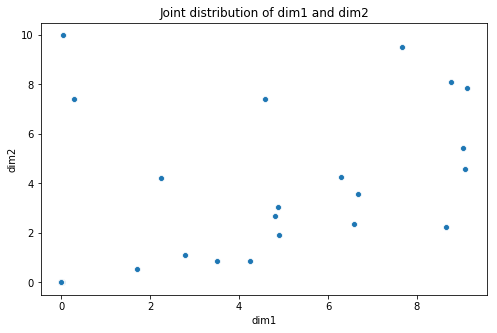

In [8]:
# Visualising the data to check for any outliers

# Plotting a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train['dim2'], y=X_train['dim1'])

# Setting the title and labels
plt.title("Joint distribution of dim1 and dim2")
plt.xlabel('dim1')
plt.ylabel('dim2')

# displaying the plot
plt.show()

In [ ]:
# Cleaning the dataset to improve data sparsity 

# Cleaning the copied training dataset by setting threshold values
X_tr_cleaned = X_train.copy() 
X_tr_cleaned[X_tr_cleaned > 1] = None 
X_tr_cleaned = X_tr_cleaned.dropna(thresh=500) 

# Calculating the difference in indexes after X was cleaned
x_index_set = set(X_tr_cleaned.index.values)
y_index_set = set(y_train.index.values)

indexes_diff = list(y_index_set - x_index_set)

# cleaning the training true labels and scaling X 
y_tr_cleaned = np.array((y_train.drop(index=indexes_diff)).reset_index().drop(columns='index')).reshape(-1,) #convert to a numpy array
X_tr_scaled = pd.DataFrame((preprocessing.scale(X_tr_cleaned)), columns = X_train.columns) 

# Copying values to default variables
X_train = X_tr_scaled.copy()
y_train = y_tr_cleaned.copy()

# Printing shapes
print("X_train shape {0}, y_train shape {1}".format(X_train.shape, y_train.shape))

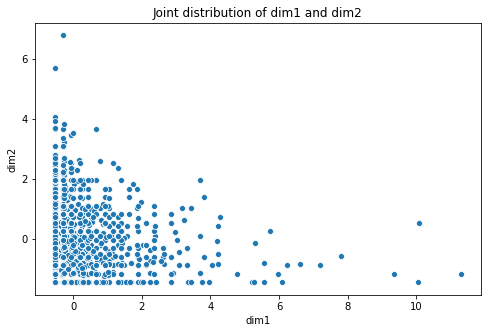

In [10]:
# Visualising the data to check for data distribution - post-clean

# Plotting a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train['dim2'], y=X_train['dim1'])

# Setting the title and labels
plt.title("Joint distribution of dim1 and dim2")
plt.xlabel('dim1')
plt.ylabel('dim2')

# displaying the plot
plt.show()

In [11]:
# Creating the KFold validation object to improve the training accuracy

kf = KFold(n_splits=5, shuffle=True, random_state=None)

In [12]:
# Metric Output Functions

# Calulating and printing the accuracy of the classifier on the training and validation sets
def accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid):
    
    print("Classification Accuracy:")
    accuracy_train = accuracy_score(y_true=y_train, y_pred=pred_train)
    print("Training    - Classification Accuracy - {0:.3f} (to 3 decimal places).".format(accuracy_train))
    accuracy_valid = accuracy_score(y_true=y_valid, y_pred=pred_valid)
    print("Validation  - Classification Accuracy - {0:.3f} (to 3 decimal places).".format(accuracy_valid))


# Calculating and printing the logarithmic loss of the classifier on the training and validation sets
def log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid):
    
    print("\nLogarithmic Loss:")
    logloss_train = log_loss(y_true=y_train, y_pred=pred_train)
    print("Training    - Logarithmic Loss - {0:.3f} (to 3 decimal places).".format(logloss_train))
    logloss_valid = log_loss(y_true=y_valid, y_pred=pred_valid)
    print("Validation  - Logarithmic Loss - {0:.3f} (to 3 decimal places).".format(logloss_valid))
    

# Calculating and printing the r^2 score of the classifier on the training and testing sets
def r2_score_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid):
    
    print("R^2 Score:")
    r_2_train = r2_score(y_true=y_train, y_pred=pred_train)
    print("Training - R^2 Score - {0:.3f} (to 3 decimal places).".format(r_2_train))
    r_2_valid = r2_score(y_true=y_valid, y_pred=pred_valid)
    print("Testing  - R^2 Score - {0:.3f} (to 3 decimal places).".format(r_2_valid))


In [13]:
# Baseline Classifier - Coin Flip Model

# Creating the constant value Dummy model and training it to act as a baseline
dm_clf = DummyClassifier(strategy='constant', constant=0, random_state=0)
dm_clf.fit(X_train, y_train)

# Predicting the values of the training and testing data
pred_train = dm_clf.predict(X_train)
pred_valid = dm_clf.predict(X_valid)

## Success Metrics

print("\nBaseline")
print("--------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)


Baseline
--------

Classification Accuracy:
Training    - Classification Accuracy - 0.551 (to 3 decimal places).
Validation  - Classification Accuracy - 0.527 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 15.512 (to 3 decimal places).
Validation  - Logarithmic Loss - 16.354 (to 3 decimal places).


In [14]:
# Multinomial Naive Bayes

# # Creating the model and training it
# nb_clf = MultinomialNB()
# nb_clf.fit(X_train, y_train)

# # Predicting the values of the training and testing data
# pred_train = nb_clf.predict(X_train)
# pred_valid = nb_clf.predict(X_valid)

# ## Success Metrics

# print("\nMultinomial Naive Bayes")
# print("-----------------------\n")

# accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
# log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)

In [15]:
# Linear Regression

# Creating the model and training it
lir_clf = LinearRegression()
lir_clf.fit(X_train, y_train)

# Predicting the values of the training and testing data
pred_train = lir_clf.predict(X_train)
pred_valid = lir_clf.predict(X_valid)

## Success Metrics

print("\nLinear Regression")
print("-----------------\n")

r2_score_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)


Linear Regression
-----------------

R^2 Score:
Training - R^2 Score - 0.440 (to 3 decimal places).
Testing  - R^2 Score - -193.671 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 0.488 (to 3 decimal places).
Validation  - Logarithmic Loss - 13.813 (to 3 decimal places).


In [16]:
# Logistic Regression

# Creating the model and training it
lor_clf = LogisticRegression()
lor_clf.fit(X_train, y_train)

# Predicting the values of the training and testing data
pred_train = lor_clf.predict(X_train)
pred_valid = lor_clf.predict(X_valid)

## Success Metrics

print("\nLogistic Regression")
print("-------------------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)


Logistic Regression
-------------------

Classification Accuracy:
Training    - Classification Accuracy - 0.811 (to 3 decimal places).
Validation  - Classification Accuracy - 0.643 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 6.535 (to 3 decimal places).
Validation  - Logarithmic Loss - 12.320 (to 3 decimal places).



Calculating the Best kNN classifier
-----------------------------------



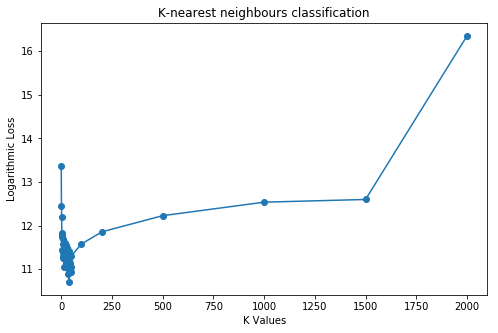


The most accurate classifier was 40-NN with logarithmic loss 10.706 on the test set (to 3 decimal places).


KNN Classifier
--------------

Classification Accuracy:
Training    - Classification Accuracy - 0.697 (to 3 decimal places).
Validation  - Classification Accuracy - 0.690 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 10.479 (to 3 decimal places).
Validation  - Logarithmic Loss - 10.706 (to 3 decimal places).


In [17]:
# KNN model

## Training the classifier multiple times, each time setting the KNN option to a different value:

print("\nCalculating the Best kNN classifier")
print("-----------------------------------\n")

# List of the k values
k_value_list = list(range(1,50)) + [100, 200, 500, 1000, 1500, 2000]
clas_ll = []

# Storing the best perfoming knn classifier values 
best_k_value = k_value_list[0]
best_knn_classifier = KNeighboursClassifier(n_neighbors=best_k_value)
min_logloss = 100

for no_classifier, k_value in enumerate(k_value_list):
    
    # Training the KNeighboursClassifier
    knc = KNeighboursClassifier(n_neighbors=k_value)
    knc.fit(X=X_train, y=y_train)

    # Predicting the output of the training set
    y_pred = knc.predict(X_valid)

    # Calculating and printing the logarithmic loss
    logloss = log_loss(y_true=y_valid, y_pred=y_pred)
    clas_ll.append(logloss) # storing the logarithmic loss values
          
    # Storing the best k-value
    if logloss < min_logloss:
        min_logloss = logloss
        best_k_value = k_value
        best_knn_classifier = knc

## Plotting the results (k-value on the x-axis and classification accuracy on the y-axis), marking the axes too:

# Creating the bar graph
plt.figure(figsize=(8,5))
plt.scatter(k_value_list, clas_ll)
plt.plot(k_value_list,clas_ll, )

# Adding title and labels
plt.title("K-nearest neighbours classification")
plt.xlabel("K Values")
plt.ylabel("Logarithmic Loss")

# Plotting the graph
plt.show()

# Providing output about which was the best classifier
print("\nThe most accurate classifier was {0}-NN with logarithmic loss {1:.3f} on the test set (to 3 decimal places).\n"
      .format(best_k_value, min_logloss))


## Using the best chosen knn classifier

knn_clf = best_knn_classifier

# Predicting the values of the training and testing data
pred_train = knn_clf.predict(X_train)
pred_valid = knn_clf.predict(X_valid)

## Success Metrics

print("\nKNN Classifier")
print("--------------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)

In [18]:
#  SVMs

# Training an SVM with a Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X=X_train, y=y_train)

# Predicting the values of the training and testing data
pred_train = svm_linear.predict(X_train)
pred_valid = svm_linear.predict(X_valid)

## Success Metrics

print("\nSVM - Linear Classifier")
print("--------------------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)

# Training an SVM with a RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X=X_train, y=y_train)

# Predicting the values of the training and testing data
pred_train = svm_rbf.predict(X_train)
pred_valid = svm_rbf.predict(X_valid)

## Success Metrics

print("\nSVM - RBF Classifier")
print("--------------------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)

# Training an SVM with a 2nd-order degree polynomial Kernel
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X=X_train, y=y_train)

# Predicting the values of the training and testing data
pred_train = svm_poly.predict(X_train)
pred_valid = svm_poly.predict(X_valid)

## Success Metrics

print("\nSVM - Poly Classifier")
print("--------------------\n")

accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)



SVM - Linear Classifier
--------------------

Classification Accuracy:
Training    - Classification Accuracy - 0.842 (to 3 decimal places).
Validation  - Classification Accuracy - 0.630 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 5.446 (to 3 decimal places).
Validation  - Logarithmic Loss - 12.785 (to 3 decimal places).

SVM - RBF Classifier
--------------------

Classification Accuracy:
Training    - Classification Accuracy - 0.911 (to 3 decimal places).
Validation  - Classification Accuracy - 0.714 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 3.086 (to 3 decimal places).
Validation  - Logarithmic Loss - 9.868 (to 3 decimal places).

SVM - Poly Classifier
--------------------

Classification Accuracy:
Training    - Classification Accuracy - 0.940 (to 3 decimal places).
Validation  - Classification Accuracy - 0.684 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 2.079 (to 3 decimal places).
Validat

In [21]:
# Optimising the SVM rbf function given that it has the best results
# of the SVMs

# initialising the folds and possible values of c
no_folds = 5
c_vals = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]

# initialising the folds and array
kf = KFold(n_splits=no_folds, shuffle=True, random_state=0)
arr = np.zeros((5,11))

# lopping over each possible value of c
for no, c_val in enumerate(c_vals):
    
    # calculating the cross val score for each training classifier with value of c
    svm_rbf = SVC(kernel='rbf', C=c_val)
    svm_rbf.fit(X=X_train, y=y_train)
    score = cross_val_score(svm_rbf, X_train, y_train, cv=kf)
    for fold in range(no_folds):    # For each fold
        arr[fold, no] = score[fold]

# printing the best value of c
best_c_val = c_vals[np.argmax(np.mean(arr,0))]
print("The best value of C is: {0}".format(best_c_val))

The best value of C is: 1


In [23]:
# Taking the best value of c and incorporating it into our model

svm_rbf.probability = True
svm_rbf.set_params(C=best_c_val)
svm_rbf.fit(X_train, y_train)

# Predicting the values of the training and testing data
pred_train = svm_rbf.predict(X_train)
pred_valid = svm_rbf.predict(X_valid)

# Success metrics
accuracy_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)
log_loss_out(X_train, X_valid, y_train, y_valid, pred_train, pred_valid)

# Computing the test set predicted probabilities
pred_probabilities = svm_rbf.predict_proba(X_test)

Classification Accuracy:
Training    - Classification Accuracy - 0.911 (to 3 decimal places).
Validation  - Classification Accuracy - 0.714 (to 3 decimal places).

Logarithmic Loss:
Training    - Logarithmic Loss - 3.086 (to 3 decimal places).
Validation  - Logarithmic Loss - 9.868 (to 3 decimal places).


#ANSWER_TEXT#

***My answer:***

My initial strategy for solving this mini challange was to try each of the classifiers I have learned in class one by one. However, I quickly found this was a fools errand and revised my approach to visualise and clean the data. Doing this allowed me to get better results almost immediately. Continuing to work on the other courseworks, I was able to improve my optimisation of classifiers and found SVMs to be useful for this task. 

In my solution, I have optimised the rbf SVM with the best value for C. I choose this particular SVM as it had the best values of log_loss and classification in comparison with the alternative SVMs. However, the C optimisation was not as effective as I hoped, and the C value that was returned was 1. This meant that the results after the C search were the same as before it. I feel with further optimisation this could certainly be improved.

I have enjoyed this mini challenge, and think I have learned a lot from it.

In [24]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.20608068, 0.79391932
0.20678762, 0.79321238
0.20516361, 0.79483639
0.20503277, 0.79496723
0.20583845, 0.79416155
0.20393996, 0.79606004
0.20461600, 0.79538400
0.20395726, 0.79604274
0.20736828, 0.79263172
0.20566317, 0.79433683
0.20485384, 0.79514616
0.20651068, 0.79348932
0.20593622, 0.79406378
0.20550802, 0.79449198
0.20368622, 0.79631378
0.20498858, 0.79501142
0.20361369, 0.79638631
0.20610371, 0.79389629
0.20614425, 0.79385575
0.20566398, 0.79433602
0.20758395, 0.79241605
0.20545275, 0.79454725
0.20583771, 0.79416229
0.20411817, 0.79588183
0.20587676, 0.79412324
0.20377439, 0.79622561
0.20416992, 0.79583008
0.20658392, 0.79341608
0.20510272, 0.79489728
0.20451240, 0.79548760
0.20575912, 0.79424088
0.20485352, 0.79514648
0.20695729, 0.79304271
0.20501023, 0.79498977
0.20591104, 0.79408896
0.20518604, 0.79481396
0.20433370, 0.79566630
0.20649021, 0.79350979
0.20655141, 0.79344859
0.20533406, 0.79466594
0.20550029, 0.79449971
0.20500983, 0.79499017
0.20509907, 0.79490093
0.20625968,